In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Question 10

In [2]:
weekly = pd.read_csv("weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
#We first need to convert the qualitative data into numerical data
# 1 means up, 0 means Down
weekly['Movement'] = np.where(weekly['Direction'] == 'Up', 1, 0)
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Movement
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [4]:
#numerical summary
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Movement
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,-0.022200
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.050004
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,0.072696
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.022913
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.020549
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.018168
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,-0.017995
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,0.720025
Movement,-0.022200,-0.050004,0.072696,-0.022913,-0.020549,-0.018168,-0.017995,0.720025,1.000000


In [15]:
results = smf.logit("Movement ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data = weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Movement   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                0.006580
Time:                        11:15:14   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

1. there is negative correlation between direction and Lag1, Lag3, Lag4, Lag5 and volume
2. there is positive relation between Direction and Lag2
3. Lag2 is statistically significant because of the small p-value

In [16]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)
confusion_matrix(weekly['Movement'], predictions)

array([[ 54, 430],
       [ 48, 557]])

In [17]:
print("Correct prediction:", 611 / 1089)

Correct prediction: 0.5610651974288338


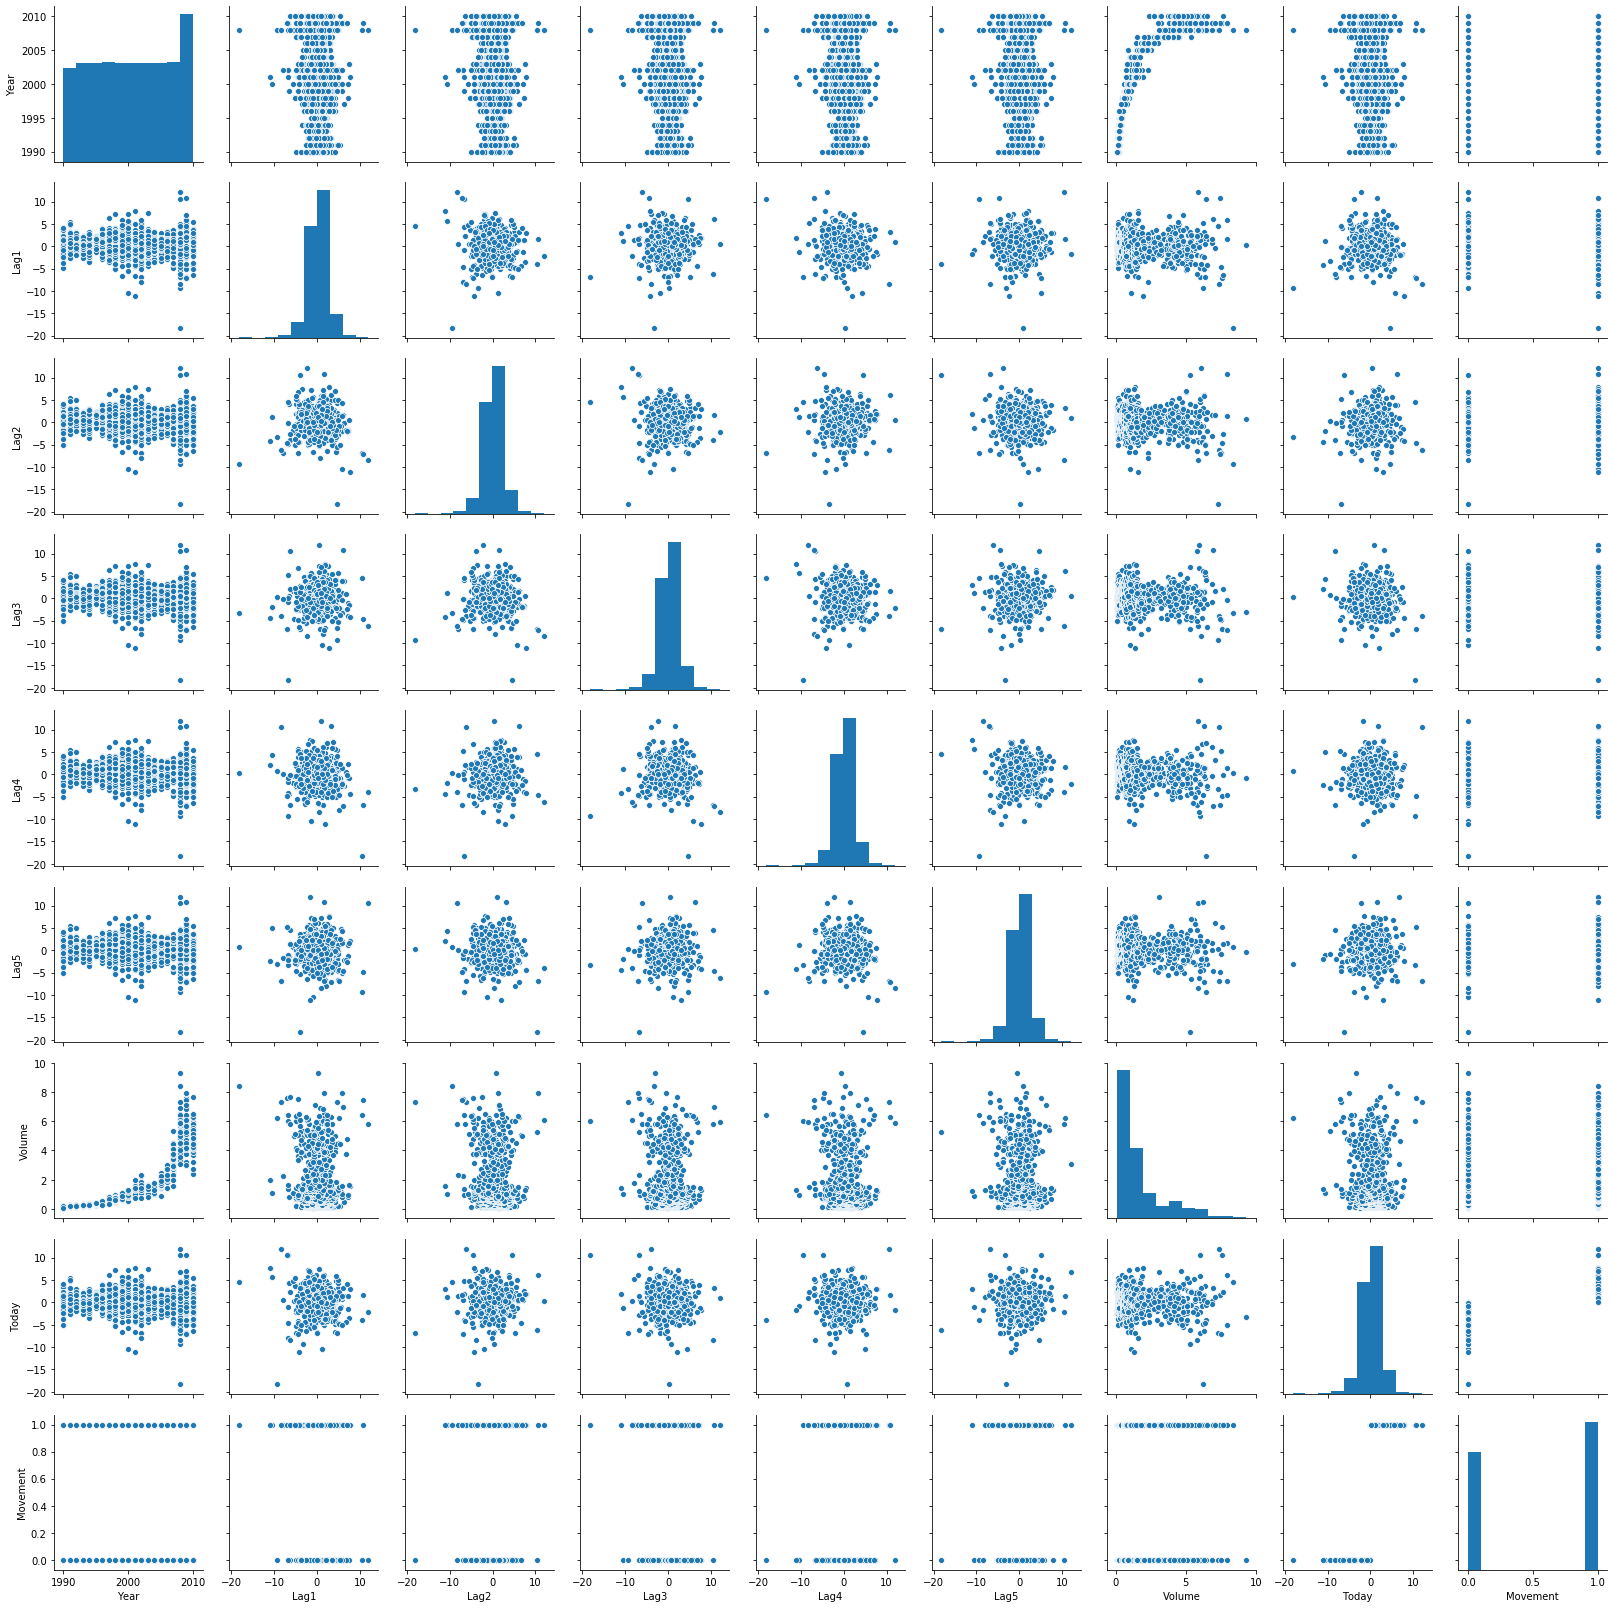

In [6]:
# graphical summary
sns.pairplot(weekly)

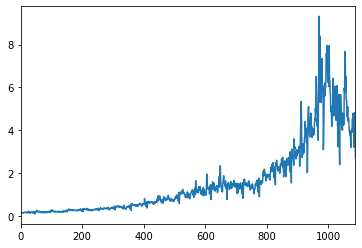

In [9]:
weekly["Volume"].plot()

In [18]:
# time for the confusion matrix
results = smf.logit('Movement ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Movement   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                0.003866
Time:                        11:16:08   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [19]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)

In [20]:
confusion_matrix(weekly['Movement'], predictions)

array([[ 33, 451],
       [ 26, 579]])

Out of the 59 predicted down days, 33 were actually down

Out of the 1030 predicted up, 579 were actually up.

In [21]:
print("Correct prediction:", 612 / 1089)

Correct prediction: 0.5619834710743802


In [22]:
weekly['Movement'].mean()

0.5555555555555556

The logistic regression has roughly 56% accuracy which is higher than the 55.6% accuracy rate of the mean method.

In [24]:
#Now it is time to seperate the data into training set and test set
year_bool = weekly["Year"] < 2009
weekly["ones"] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
confusion_matrix(y_test, lr.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

In [28]:
print("Correct prediction:", 65 / 104)

Correct prediction: 0.625


In [29]:
#using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[ 9, 34],
       [ 5, 56]])

In [30]:
print("Correct prediction:", 65 / 104)

Correct prediction: 0.625


In [31]:
#Using QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([[43,  0],
       [61,  0]])

In [32]:
print("Correct prediction:", 43 / 104)

Correct prediction: 0.41346153846153844


In [34]:
#Using KNN
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[21, 22],
       [31, 30]])

In [35]:
print("Correct prediction:", 51 / 104)

Correct prediction: 0.49038461538461536


It is clear that LDA and Logistic Regression work the best. This is possibly because the relationship is linear and both QDA and KNN are overfitting

In [37]:
# trying the different combinations including transformations and interaction
results = smf.logit('Movement ~ Lag2 * Lag4', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.683845
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Movement   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                0.004536
Time:                        11:30:19   Log-Likelihood:                -744.71
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.07901
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2200      0.062      3.576      0.000       0.099       0.341
Lag2           0.0616      0.027      2.287      0.022       0.009       0.114
Lag4          -0.0216      0.026     -0.827      0.408      -0.073       0.030
Lag2:Lag4     -0.0043      0.008     -0.558      0.577      -0.019       0.011
==============================================================================
"""

In [38]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)
confusion_matrix(weekly['Movement'], predictions)

array([[ 30, 454],
       [ 26, 579]])

In [39]:
print("Correct prediction:", 609 / 1089)

Correct prediction: 0.559228650137741


In [41]:
results = smf.logit('Movement ~ Lag2 + np.power(Lag2, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.683826
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Movement   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                0.004564
Time:                        11:32:08   Log-Likelihood:                -744.69
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.03290
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1910      0.066      2.916      0.004       0.063       0.319
Lag2                  0.0676      0.027      2.500      0.012       0.015       0.121
np.power(Lag2, 2)     0.0043      0.004      1.010      0.313      -0.004       0.013
=====================================================================================
"""

In [42]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)
confusion_matrix(weekly['Movement'], predictions)

array([[ 28, 456],
       [ 24, 581]])

In [43]:
print("Correct prediction:", 609 / 1089)

Correct prediction: 0.559228650137741


In [44]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[20, 23],
       [20, 41]])

In [45]:
print("Correct prediction:", 61 / 104)

Correct prediction: 0.5865384615384616


# Question 11

In [47]:
auto = pd.read_csv("Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:
median = auto['mpg'].median()

In [51]:
auto['mpg01'] = np.where(auto['mpg'] > median , 1, 0)

In [54]:
auto = auto.drop("mpg", axis = 1)
auto.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0


In [55]:
auto.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


In [56]:
results = smf.logit("mpg01 ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data = auto).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                  0.7101
Time:                        11:42:14   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

mpg01 has a negative correlation with cylinders, horsepower, weight

mpg01 has a positive relationship with displacement, acceleration, year and origin

horsepower is statistically significant because of its low p-value

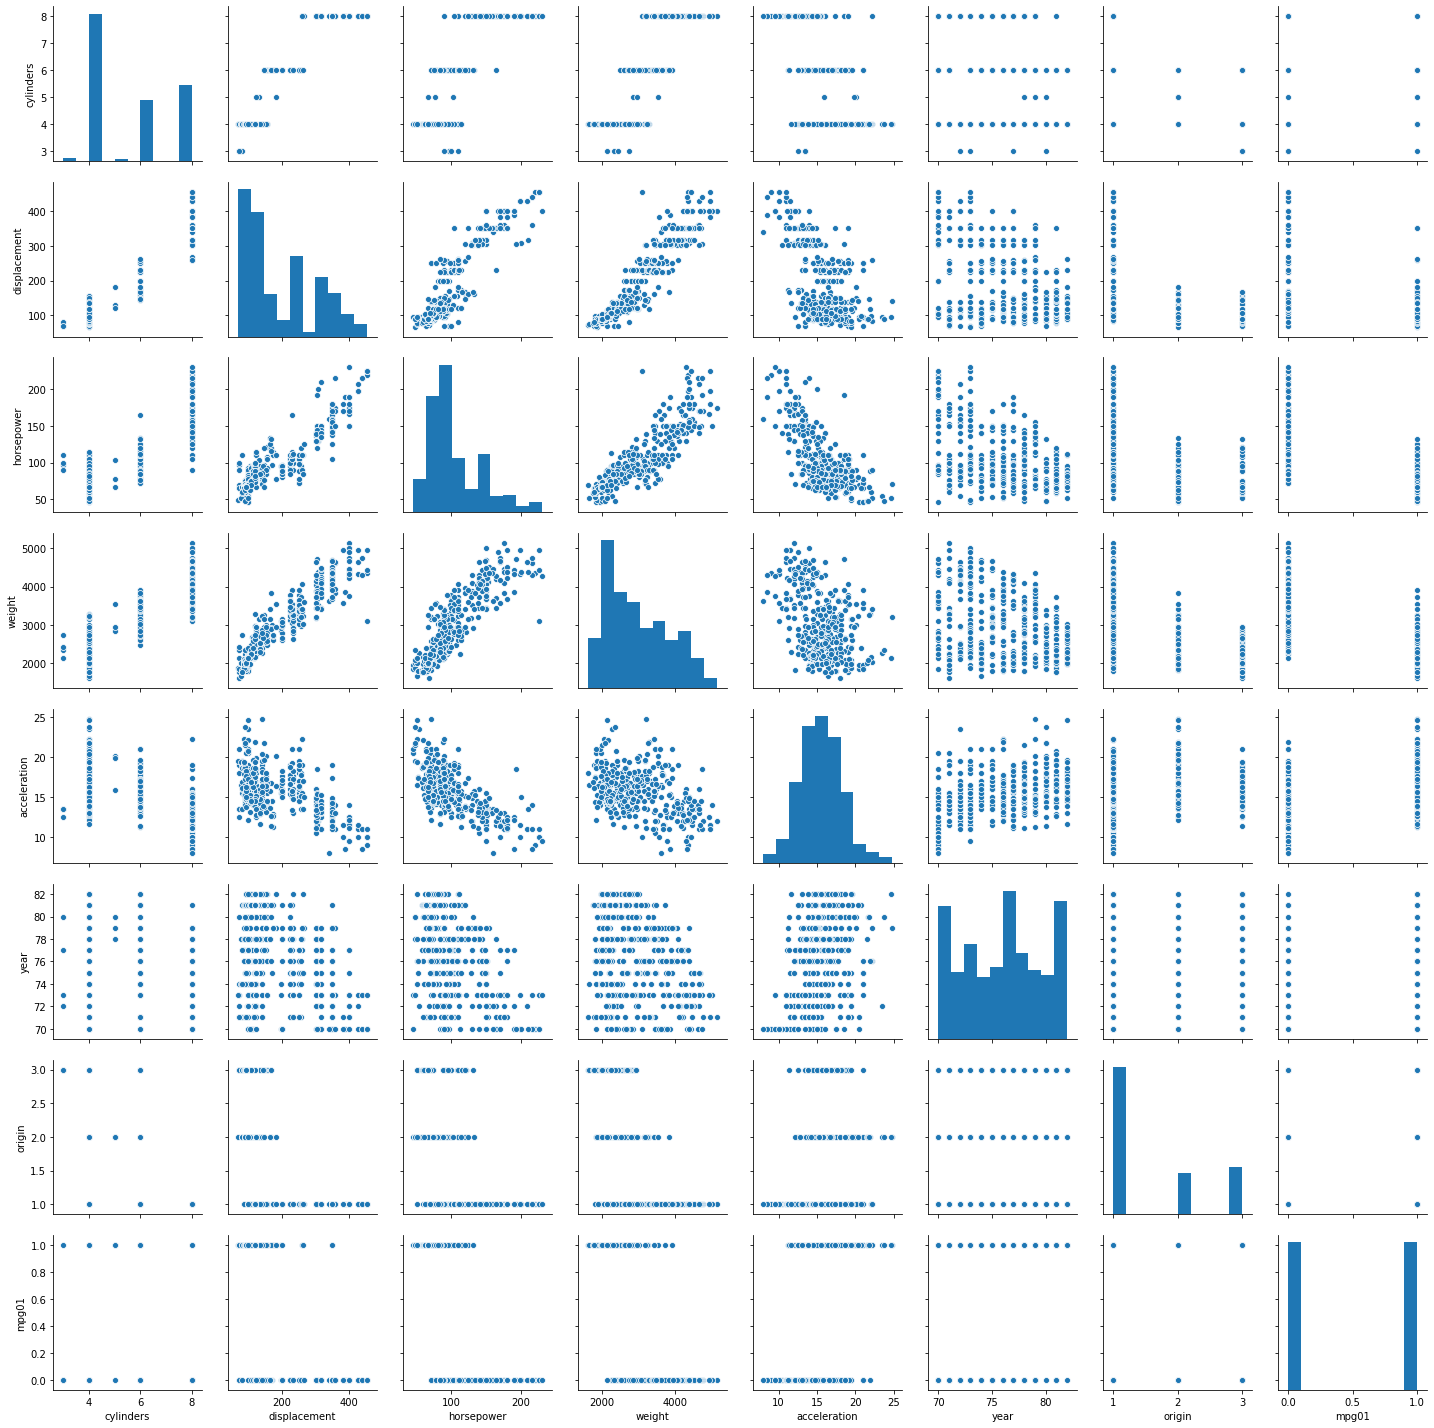

In [60]:
sns.pairplot(auto)

In [58]:
predictions = np.where(results.predict(auto) > .5, 1, 0)
confusion_matrix(auto['mpg01'], predictions)

array([[173,  23],
       [ 13, 183]])

In [59]:
print("Correct prediction:", 356 / 392)

Correct prediction: 0.9081632653061225


In [61]:
results = smf.logit("mpg01 ~ horsepower", data = auto).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.352686
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  392
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Sep 2019   Pseudo R-squ.:                  0.4912
Time:                        11:47:18   Log-Likelihood:                -138.25
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 5.320e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2988      1.007      9.233      0.000       7.325      11.273
horsepower    -0.0967      0.011     -8.957      0.000      -0.118      -0.076
==============================================================================
"""

In [63]:
predictions = np.where(results.predict(auto) > 0.5, 1, 0)
confusion_matrix(auto["mpg01"], predictions)

array([[157,  39],
       [ 21, 175]])

In [64]:
print("Correct prediction:", 332 / 392)

Correct prediction: 0.8469387755102041


In [66]:
X = auto[["cylinders", 'displacement', "horsepower", "weight", "acceleration", "year", "origin"]]
y = auto["mpg01"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test))

/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[55, 15],
       [ 2, 58]])

In [71]:
print("Correct prediction:", 113 / 130)

Correct prediction: 0.8692307692307693


In [70]:
lr = LinearDiscriminantAnalysis()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test))

array([[53, 17],
       [ 0, 60]])

In [73]:
print("Correct prediction:", 113 / 130)

Correct prediction: 0.8692307692307693


In [75]:
lr = QuadraticDiscriminantAnalysis()
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test))

array([[54, 16],
       [ 3, 57]])

In [76]:
print("Correct prediction:", 111 / 130)

Correct prediction: 0.8538461538461538


In [77]:
#important attributes: horsepower, year, weight
X = auto[["horsepower", "weight",  "year"]]
y = auto["mpg01"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
lr = KNeighborsClassifier(n_neighbors= 2)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test))

array([[61,  9],
       [10, 50]])

In [92]:
print("Correct prediction:", 111 / 130)

Correct prediction: 0.8538461538461538


# Question 13

In [94]:
boston = pd.read_csv('boston.csv')
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston = boston.drop("Unnamed: 0", axis = 1)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [96]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

array([[59,  1],
       [11, 56]])

In [97]:
print("Correct prediction:", 115 /  127)

Correct prediction: 0.905511811023622


In [101]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[53,  7],
       [ 9, 58]])

In [102]:
print("Correct prediction:", 111 /  127)

Correct prediction: 0.8740157480314961


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
confusion_matrix(y_test, lr.predict(X_test))

/Users/aviralsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[56,  4],
       [12, 55]])

In [104]:
print("Correct prediction:", 111 /  127)

Correct prediction: 0.8740157480314961
